In [1]:

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import glob
import cv2 


In [2]:

# Get path for files
path_root = '/Users/armad'

In [3]:
# %% import database
filelists = glob.glob(path_root+'/dataset_landscape/*.jpg')
original_nb_image = len(filelists)
m = 1000 # Reduce the size to compute faster
l = 800 # Length of images
n = l*l # Number of pixels

In [4]:
# Create X matrix
X = []
for filelist in filelists[:m]:
    # Open image in an array
    image = cv2.imread(filelist)
    # convert to grayscale (removes 2*l*l dimensions)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize image (needed to create the matrix)
    resized_image_gray = cv2.resize(image_gray, (l, l))
    # Reshape the image into a vector
    X_vector = resized_image_gray.reshape(n)
    # Substract the mean
    X_vector = X_vector - np.mean(X_vector)
    #Substract the mean
    X.append(X_vector)

NameError: name 'ax2' is not defined

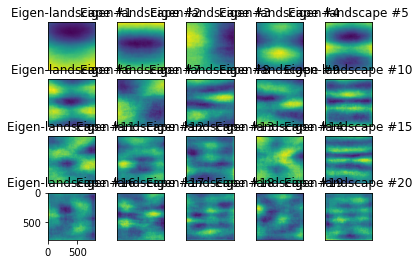

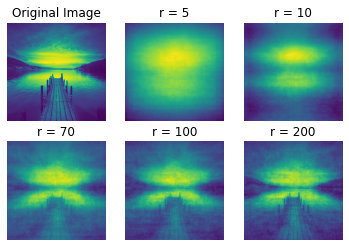

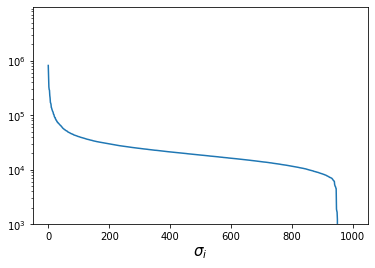

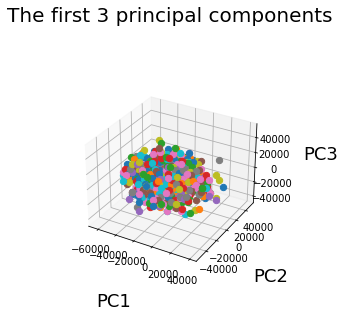

In [5]:
# %% SVD
from scipy.linalg import svd

# Reshape to get a [n * m] matrix    
X = np.array(X).T

# Compute the SVD 
U,S,V_T = svd(X, full_matrices=False)
Sigma = np.diag(S)

# %% Plot

# Eigenlandscape
nb_plots = 20 # Number of eigenlandscape in plot
nb_col = 5 # Number of plot per columns
rest = nb_plots % nb_col  # if ever
nb_rows = int(nb_plots/nb_col) + rest # Number of plot per rows

fig = plt.figure()
for i, idx in enumerate(range(0, nb_plots)):
    
    # Get the eigenlandscape
    eigen_landscape = U[:, idx]
    eigen_landscape = eigen_landscape.reshape(l, l)
    
    # Plot "eigen-landscape"
    ax = fig.add_subplot(nb_rows, nb_col, i+1)    
    ax.set_title(f'Eigen-landscape #{idx+1}')
    ax.imshow(eigen_landscape)
    if i != nb_plots-nb_col:
        ax.set_xticks([])
        ax.set_yticks([])
#plt.tight_layout()


# %% Plot image reconstruction

# Number of dimensions to test
dimensions = [5, 10, 70, 100, 200]

# Plot the original image number k of the dataset
k = 1
fig0 = plt.figure()
nb_plots = len(dimensions)+1 # Number of image reconstructed in plot
nb_col = 3 # Number of plot per row
rest = nb_plots % nb_col  # if ever
nb_rows = int(nb_plots/nb_col) + rest # Final number of plot per rows

# Plot first the original image
ax0 = fig0.add_subplot(nb_rows, nb_col, 1)
ax0.imshow(X[:, k].reshape(l, l))
ax0.axis('off')
ax0.set_title("Original Image")

# Next plot the reconstructed images
for i, r in enumerate(dimensions):
    ax0 = fig0.add_subplot(nb_rows, nb_col, i+2)
    img_approx = U[:, :r] @  Sigma[0:r, :r] @ V_T[:r, k]
    img_approx = img_approx.reshape(l, l)
    ax0.imshow(img_approx)
    ax0.set_title("r = "+str(r))
    ax0.axis('off')

# %% Plot the eigen-values

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.semilogy(S)
ax1.set_xlabel('$i$', fontsize=15)
ax1.set_xlabel('$\sigma_i$', fontsize=15)
ax1.set_ylim([10e2, max(S)*12])

    
# %% PCA

# Get the third first principal components and plot them
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
for j in range(X.shape[1]):
    x = U[:, 0] @ X[:, j].T # PC1
    y = U[:, 1] @ X[:, j].T # PC2
    z = U[:, 2] @ X[:, j].T # PC3
    
    ax1.scatter(x, y, z, s=40)
    
ax1.set_xlabel('PC1', fontsize=18, labelpad=20)
ax1.set_ylabel('PC2', fontsize=18, labelpad=20)
ax1.set_zlabel('PC3', fontsize=18, labelpad=20)
ax1.set_title('The first 3 principal components', fontsize=20, pad=60)
plt.tight_layout()



In [ ]:
# %% Total variance with % of information
ax2.set_ylim([0.25, 1.1])
ax2.set_xlim([-50, m+50])

information_kept = 0.8 
# Find corresponding index
r_target = np.argmin(abs(total_variance - information_kept))
x = np.linspace(-100, r_target, 10)
y = 0.8*np.ones(len(x))
# Plot vertical line
ax2.plot(x, y, '--', color='r', linewidth=2)
# Plot horizontal line
y = np.linspace(0, information_kept, 20)
x = r_target*np.ones(len(y))
ax2.plot(x, y, '--', color='r', linewidth=2)


# In[ ]: